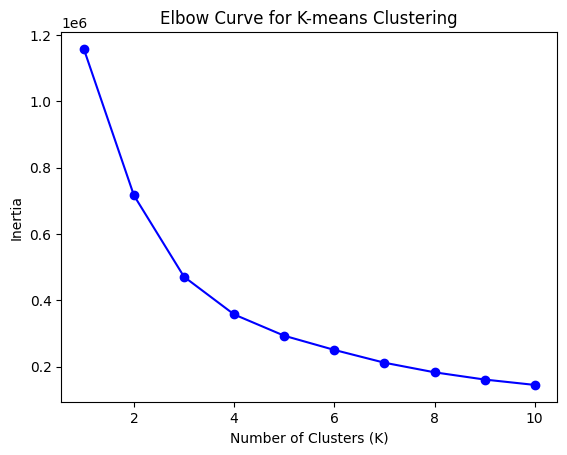

The optimal number of clusters (K) is: 10


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Preprocess the data
def preprocess_data(df):
    # Convert 'peak time' to datetime if it's not already
    df['peak time'] = pd.to_datetime(df['peak time'])
    
    # Extract relevant features
    features = df[['peak time', 'peak(dB)']].copy()
    
    # Convert 'peak time' to a numeric value (e.g., seconds since epoch)
    features['peak time'] = features['peak time'].astype(np.int64) / 10**9
    
    # Normalize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)
    
    return scaled_features

# Implement the elbow method
def elbow_method(data, max_k=10):
    inertias = []
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    return k_values, inertias

# Visualize the elbow curve
def plot_elbow_curve(k_values, inertias):
    plt.plot(k_values, inertias, 'bo-')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.title('Elbow Curve for K-means Clustering')
    plt.show()

# Main function
def main(file_path):
    # Load and preprocess the data
    df = load_data(file_path)
    scaled_features = preprocess_data(df)
    
    # Perform elbow method
    k_values, inertias = elbow_method(scaled_features)
    
    # Plot the elbow curve
    plot_elbow_curve(k_values, inertias)
    
    # Find the optimal K (you may need to adjust this based on the plot)
    optimal_k = find_optimal_k(k_values, inertias)
    print(f"The optimal number of clusters (K) is: {optimal_k}")

def find_optimal_k(k_values, inertias):
    # This is a simple method to find the elbow point
    # You may want to use more sophisticated methods for real-world applications
    diffs = np.diff(inertias)
    optimal_k = k_values[np.argmax(diffs) + 1]
    return optimal_k

# Run the script
if __name__ == "__main__":
    file_path = "data/iris-event-list.csv"
    main(file_path)